# Creating neural networks with Keras

Keras is a open-source neural network library. It helps you build and train neural networks and then use them to make predictions.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import fashion_mnist  # Fashion MNIST dataset is included in Keras
from keras.models import Sequential, Model  # Neural network Model type to be used


from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

## Preparing the data

A big part of any machine learning process is preparing the data to be evaluated by the neural network. We are working with a widely used existing dataset so there is minimal preprocessing required. 

When working with your own data you may need to spend some time resizing, cleaning and filtering to get a manageable data set. 

The existing dataset is also nicely divided into training and testing sets.

### Download dataset from Keras

We download the data and separate it into **training** and **testing** sets. Each of these are separated into **x** (input images) and **y** (output labels). We also create a list to hold the names of the various classes detected by the network.

In [0]:
(training_input, training_output), (test_input, test_output) = fashion_mnist.load_data()

example_images = test_input[:9]
example_labels = test_output[:9]

LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']


### Preview dataset

Lets take a look at what makes up the dataset we will use.

Training input shape:  (60000, 28, 28)
Training output shape:  (60000,)
Test input shape:  (10000, 28, 28)
Test output shape:  (10000,)


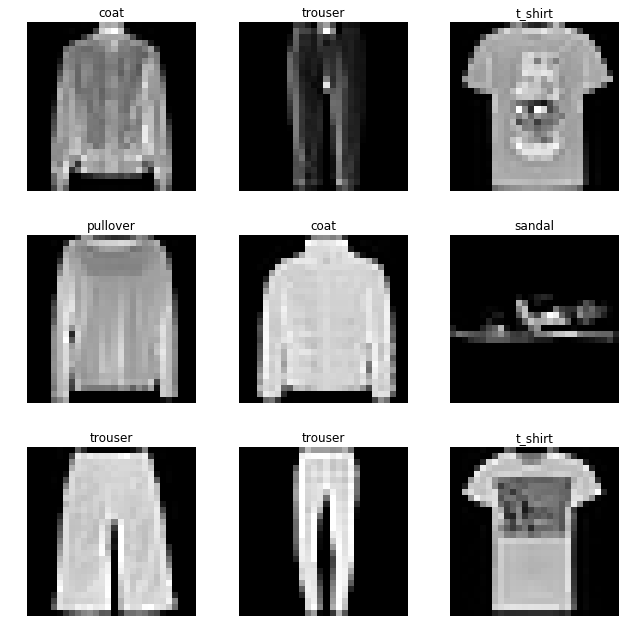

In [0]:
print('Training input shape: ', training_input.shape)
print('Training output shape: ', training_output.shape)
print('Test input shape: ', test_input.shape)
print('Test output shape: ', test_output.shape)

plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    index = random.randint(0, len(training_input))
    image = training_input[index]
    labelIndex = training_output[index]
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.axis('off')
    plt.title(LABEL_NAMES[labelIndex])
    
plt.tight_layout()

### Reshape output index to vector with one value for each category.

In [0]:
nb_classes = 10 # number of unique digits

training_output = np_utils.to_categorical(training_output, nb_classes)
test_output = np_utils.to_categorical(test_output, nb_classes)

print("training_output shape: ", training_output.shape)
print("test_output shape: ", test_output.shape)
print("First output vector: ", test_output[0])

training_output shape:  (60000, 10)
test_output shape:  (10000, 10)
First output vector:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### Reshape images into vectors

In this network we are taking 2D image data and turning it to a one dimensional vector of pixels.

In [0]:
training_input = training_input.reshape(60000, 784)
test_input = test_input.reshape(10000, 784)

training_input = training_input.astype('float32')
test_input = test_input.astype('float32')

training_input = training_input / 255
test_input = test_input / 255

print('training_input shape: ', training_input.shape)
print('training_output shape: ', training_output.shape)
print('training_input shape: ', test_input.shape)
print('training_output shape: ', test_output.shape)

training_input shape:  (60000, 784)
training_output shape:  (60000, 10)
training_input shape:  (10000, 784)
training_output shape:  (10000, 10)


## Building the network with Keras

In [0]:
model = Sequential()

In [0]:
# Input layer input shape should match input data shape for one example
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Middle (hidden) layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

### Compile the model

Now we can take our model with the layers we have added and compile it into a network that is ready to train. Two important features we need to se are the loss function and optimizer. 

The loss function is how we plan to evaluate how close the network came the right answer.

The optimizer is the method used to try and reduce the loss on the next epoch of training.

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train and test the network

Running the fit method will send the training set through the network (forward propogation) then adjust the weights to reduce the loss/error (back propogation). Each epoch represents passing the training set through the network one full time. Each epoch accumulates improvents from the previous epoch.

In [0]:
model.fit(training_input, training_output, batch_size=128, epochs=5, verbose=1)

Epoch 1/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.5157 - acc: 0.8150
Epoch 2/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.3829 - acc: 0.8606
Epoch 3/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.3472 - acc: 0.8722
Epoch 4/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.3258 - acc: 0.8805
Epoch 5/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.3112 - acc: 0.8841


### Evaluate training


After we have completed the training we can evaluate it against our test dataset.

In [0]:
score = model.evaluate(test_input, test_output)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 77us/step
Test score: 0.3391733439207077
Test accuracy: 0.8748


## Using the model to predict.

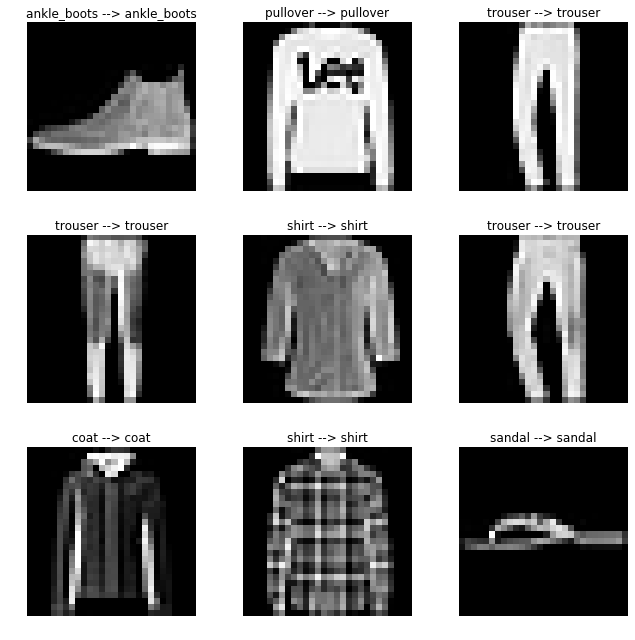

In [0]:
example_images_vectors = example_images.reshape(9, 784)
example_images_vectors = example_images_vectors.astype('float32')
example_images_vectors = example_images_vectors / 255

predictions = model.predict(example_images_vectors)

most_likely = [np.argmax(prediction) for prediction in predictions]
predicted_labels = [LABEL_NAMES[index] for index in most_likely]

plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    image = example_images[i]
    label = LABEL_NAMES[example_labels[i]] + " --> " + predicted_labels[i]
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.axis('off')
    plt.title(label)
    
plt.tight_layout()

## Saving and loading models

In [0]:
model.save('my_model.h5')

In [0]:
new_model = models.load_model('my_model.h5')

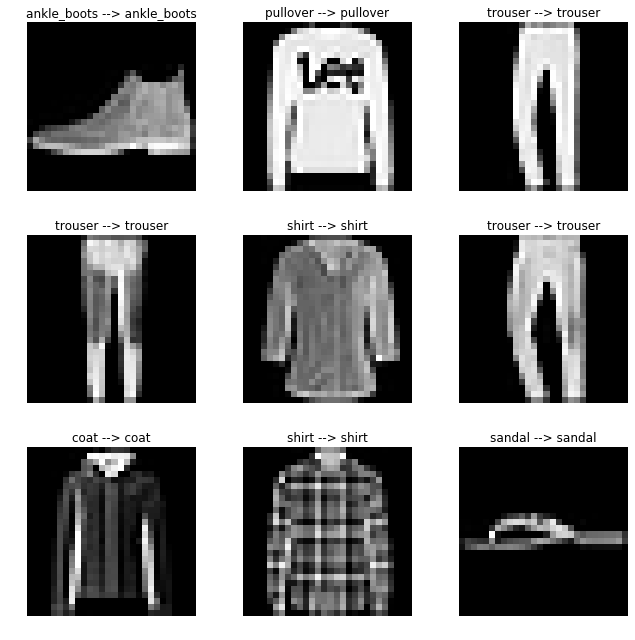

In [0]:
predictions = new_model.predict(example_images_vectors)

most_likely = [np.argmax(prediction) for prediction in predictions]
predicted_labels = [LABEL_NAMES[index] for index in most_likely]

plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    image = example_images[i]
    label = LABEL_NAMES[example_labels[i]] + " --> " + predicted_labels[i]
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.axis('off')
    plt.title(label)
    
plt.tight_layout()